In [116]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [131]:
image_directory = '/home/put_data/moth/data/COCOdataset_format/TESRI_RNDSPD_100/tesri_rndspd_100/'
annotation_file = '/home/put_data/moth/data/COCOdataset_format/TESRI_RNDSPD_100/annotations/instances_tesri_rndspd_100.json'

In [132]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


In [133]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
moth

Custom COCO supercategories: 
Moth


[830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841]


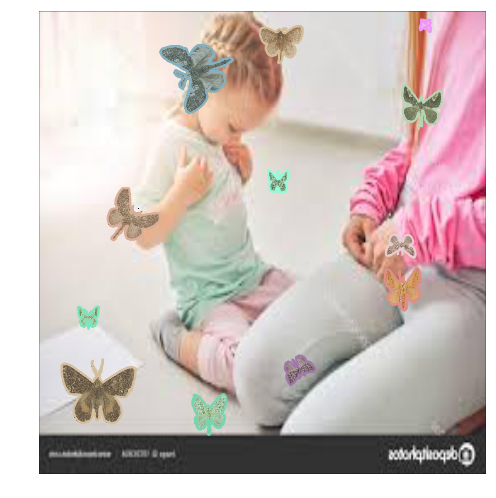

In [197]:
category_ids = example_coco.getCatIds(catNms=['moth'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
print(annotation_ids)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

[719, 720, 721, 722, 723, 724]


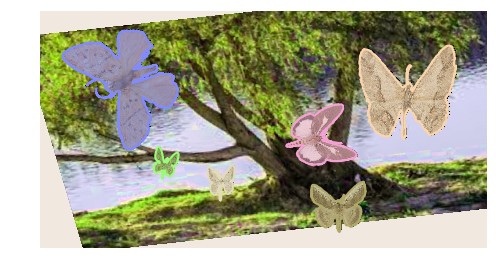

In [225]:
category_ids = example_coco.getCatIds(catNms=['moth'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
print(annotation_ids)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)